In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# PreProcessing


In [3]:
data= pd.read_csv("./Desktop/archive/diamonds.csv")

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [7]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [13]:
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [69]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [70]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
  

In [72]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [74]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
if all(col in data.columns for col in numerical_cols):
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows after preprocessing
print("Preprocessed DataFrame:\n", data.head())

Preprocessed DataFrame:
       carat  cut  color  clarity     depth     table  price         x  \
0 -1.198168    2      1        3 -0.174092 -1.099672    326 -1.587837   
1 -1.240361    3      1        2 -1.360738  1.585529    326 -1.641325   
2 -1.198168    1      1        4 -3.385019  3.375663    327 -1.498691   
3 -1.071587    3      5        5  0.454133  0.242928    334 -1.364971   
4 -1.029394    1      6        3  1.082358  0.242928    335 -1.240167   

          y         z  
0 -1.536196 -1.571129  
1 -1.658774 -1.741175  
2 -1.457395 -1.741175  
3 -1.317305 -1.287720  
4 -1.212238 -1.117674  


# Linear Regression

Linear Regression Results:
Mean Squared Error (MSE): 1825912.9915253392
R² Score: 0.8851397433679637


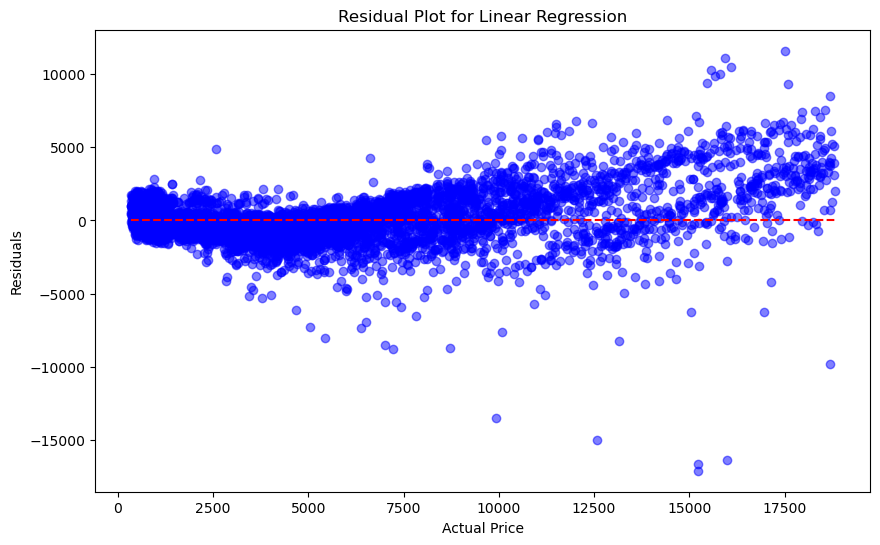

In [79]:
X = data.drop(columns=['price'])
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, color='blue', alpha=0.5)
plt.hlines(0, y_test.min(), y_test.max(), colors='red', linestyles='dashed')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

# logistic Regression

Logistic Regression Results:
Accuracy: 0.9628290693362996
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5404
           1       0.96      0.96      0.96      5384

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



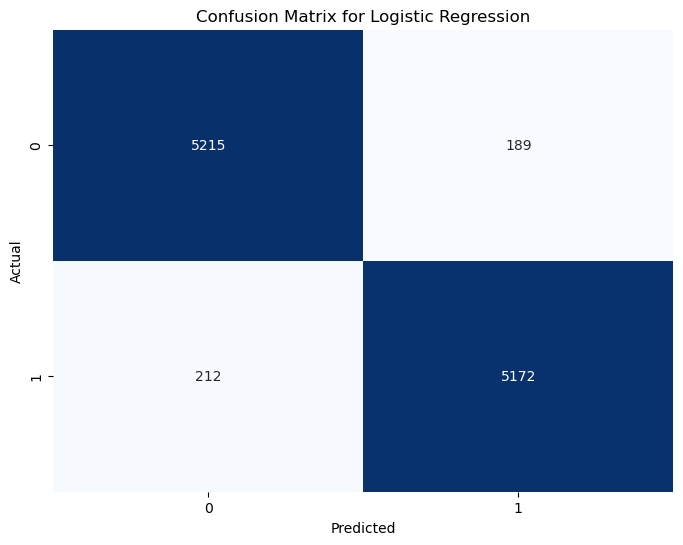

In [81]:
# Convert price into binary classification (e.g., high vs. low price)
median_price = data['price'].median()
y_binary = (data['price'] > median_price).astype(int)

# Split the data for Logistic Regression
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_bin)

# Predictions and evaluation
y_pred_bin = log_reg.predict(X_test)
accuracy = accuracy_score(y_test_bin, y_pred_bin)
conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
class_report = classification_report(y_test_bin, y_pred_bin)

print("Logistic Regression Results:")
print("Accuracy:", accuracy)
print(class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


#  Decision Tree

Decision Tree Results:
Accuracy: 0.9721913236929922
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5404
           1       0.97      0.98      0.97      5384

    accuracy                           0.97     10788
   macro avg       0.97      0.97      0.97     10788
weighted avg       0.97      0.97      0.97     10788



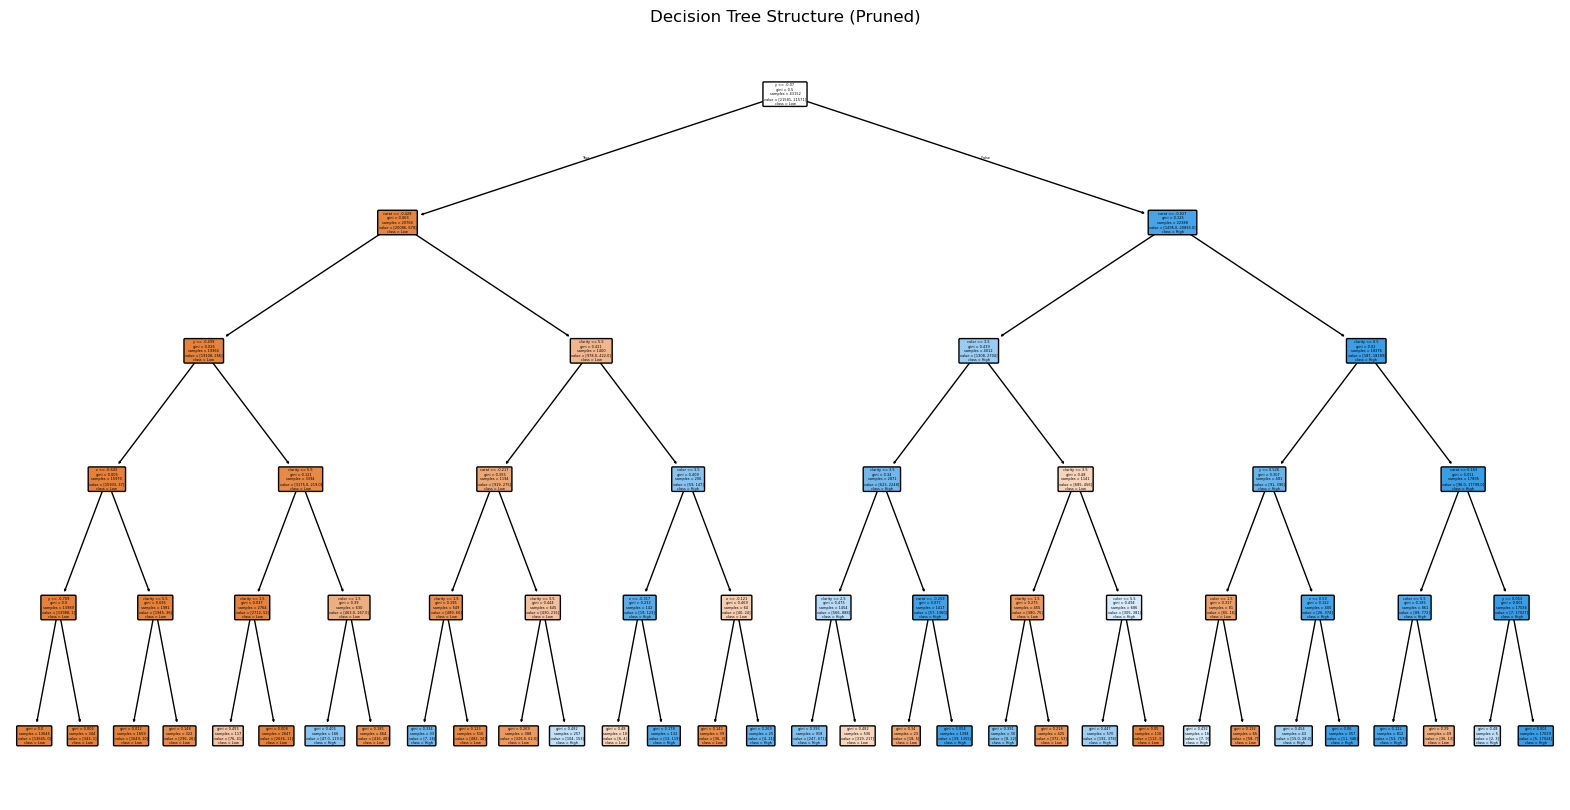

In [83]:
pruned_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_tree.fit(X_train, y_train_bin)

# Predictions and evaluation
y_pred_tree = pruned_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test_bin, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test_bin, y_pred_tree)
class_report_tree = classification_report(y_test_bin, y_pred_tree)

print("Decision Tree Results:")
print("Accuracy:", accuracy_tree)
print(class_report_tree)

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, feature_names=X.columns, class_names=['Low', 'High'], filled=True, rounded=True)
plt.title('Decision Tree Structure (Pruned)')
plt.show()

# Support Vector Machine (SVM)

SVM Results:
Accuracy: 0.9684835001853912
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5404
           1       0.97      0.97      0.97      5384

    accuracy                           0.97     10788
   macro avg       0.97      0.97      0.97     10788
weighted avg       0.97      0.97      0.97     10788



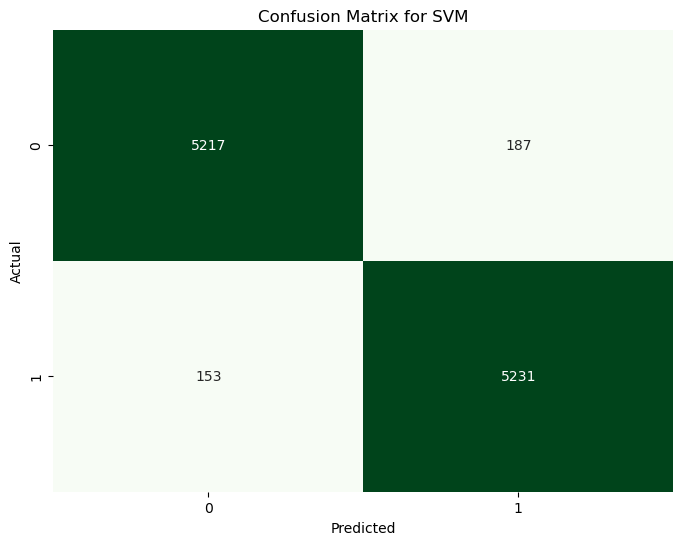

In [85]:
# SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train_bin)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test_bin, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_bin, y_pred_svm)
class_report_svm = classification_report(y_test_bin, y_pred_svm)

print("SVM Results:")
print("Accuracy:", accuracy_svm)
print(class_report_svm)

# Confusion Matrix Visualization for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


# Overfitting Checks

In [86]:
# Cross-validation for Decision Tree
cv_scores_tree = cross_val_score(pruned_tree, X, y_binary, cv=5)
tree_mean = cv_scores_tree.mean()
tree_std = cv_scores_tree.std()

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm_model, X, y_binary, cv=5)
svm_mean = cv_scores_svm.mean()
svm_std = cv_scores_svm.std()

print("Overfitting Checks:")
print("Decision Tree CV Mean Accuracy:", tree_mean)
print("Decision Tree CV Std Deviation:", tree_std)
print("SVM CV Mean Accuracy:", svm_mean)
print("SVM CV Std Deviation:", svm_std)


Overfitting Checks:
Decision Tree CV Mean Accuracy: 0.9546162402669633
Decision Tree CV Std Deviation: 0.07378202180930951
SVM CV Mean Accuracy: 0.953040415276233
SVM CV Std Deviation: 0.07192973575997078
